#  Análise de Potabilidade da Água Utilizando Técnicas de Machine Learning

Este projeto tem como objetivo avaliar a **qualidade da água** e determinar se ela é **potável ou não** com base em suas características físico-químicas, utilizando **técnicas de Machine Learning**.

O estudo foi conduzido a partir do **Water Potability Dataset** disponível no **Kaggle**, que contém diversas amostras de água e suas respectivas medições laboratoriais.

---

##  Estrutura do Estudo

O notebook foi desenvolvido em etapas sequenciais, abrangendo todo o ciclo de um projeto de ciência de dados:

1. **Importação e compreensão dos dados**  
   - Carregamento do dataset e verificação das variáveis.  
   - Identificação de valores ausentes e inconsistências.

2. **Limpeza e pré-processamento**  
   - Tratamento de valores nulos e outliers.  
   - Normalização de variáveis para melhor desempenho dos modelos.  

3. **Análise Exploratória de Dados (EDA)**  
   - Cálculo de estatísticas descritivas.  
   - Visualizações para entender a distribuição e correlação entre variáveis.

4. **Modelagem Preditiva**  
   - Aplicação de algoritmos supervisionados (como **Random Forest**).  
   - Divisão entre conjuntos de treino e teste.  
   - Avaliação do desempenho com métricas de classificação.

---

##  Principais Resultados da EDA

* **pH:** média ≈ 7.08, dentro da faixa ideal para água potável (6.5 a 8.5).  
  Contudo, há grande variação (desvio padrão 1.47) e presença de outliers (mínimo 0, máximo 14).  

* **Hardness (Dureza):** média ≈ 196.37, variando de 47.43 a 323.12.  

* **Solids (Sólidos Dissolvidos Totais):** média ≈ 22.014, com grande dispersão (máximo 61.227).  

* **Chloramines:** média ≈ 7.12, variação moderada.  

* **Sulfate:** média ≈ 333.78, com dispersão moderada.  

* **Conductivity:** média ≈ 426.21, com desvio padrão de 80.82.  

* **Trihalomethanes:** média ≈ 66.40, com leve variação.  

* **Turbidity:** média ≈ 3.97, indicando boa transparência na maioria das amostras.  

* **Potability:** média ≈ 0.39 → cerca de **39% das amostras são potáveis**.

###  Correlação entre variáveis
As correlações entre as variáveis são, em geral, **baixas**, indicando que a potabilidade da água **não depende fortemente de uma única variável**, mas sim de uma **combinação de fatores**.  
O atributo `Potability` apresenta correlação fraca com as demais colunas.

---

## Modelagem Preditiva

Foi utilizado o modelo **Random Forest Classifier**, ajustado com parâmetros padrão.

### Resultados:

- **Acurácia:** ≈ 0.666  
- **ROC AUC:** ≈ 0.662  

Esses resultados indicam um desempenho **moderado**, adequado para uma base com variabilidade elevada e características multivariadas.

### Interpretação:
O modelo consegue identificar parcialmente os padrões que distinguem amostras potáveis das não potáveis.  
Entretanto, há espaço para melhorias através de:
- Balanceamento das classes.  
- Engenharia de variáveis adicionais.  
- Ajuste fino de hiperparâmetros.  

---

##  Conclusão

A análise demonstra que:
- A **qualidade da água** é influenciada por diversos fatores físico-químicos.  
- Nenhum atributo isolado é suficiente para prever a **potabilidade**, reforçando a necessidade de **modelos multivariados**.  
- O **Random Forest** apresentou resultados consistentes e pode servir como base para otimização futura.  

O estudo reforça o valor do **Machine Learning** na **monitorização e controle da qualidade da água**, oferecendo suporte a políticas públicas e estratégias de saneamento.

---

 **Fonte dos Dados:**  
[Kaggle – Water Potability Dataset](https://www.kaggle.com/datasets/adityakadiwal/water-potability)


**Water Potability Data**

O conjunto de dados utilizado neste estudo refere-se à **análise da qualidade da água** e à **predição de sua potabilidade**, ou seja, se a água é adequada para consumo humano. Ele contém **3.276 amostras** de diferentes fontes de água e inclui **9 variáveis físico-químicas** que descrevem suas propriedades.

**Fonte:** [Kaggle – Water Potability Dataset](https://www.kaggle.com/datasets/adityakadiwal/water-potability)

As colunas do dataset são:

- **pH:** mede o grau de acidez ou alcalinidade da água, variando de 0 a 14.  
- **Hardness (Dureza):** indica a concentração de minerais como cálcio e magnésio dissolvidos na água (mg/L).  
- **Solids (Sólidos Totais Dissolvidos):** representa a quantidade de substâncias sólidas dissolvidas em miligramas por litro (mg/L).  
- **Chloramines (Cloraminas):** concentração de cloro combinado na água, usado com frequência como desinfetante (mg/L).  
- **Sulfate (Sulfato):** quantidade de íons sulfato presentes, que podem afetar o sabor e a qualidade da água (mg/L).  
- **Conductivity (Condutividade):** capacidade da água de conduzir eletricidade, diretamente relacionada à presença de sais minerais (µS/cm).  
- **Organic_carbon (Carbono Orgânico):** quantidade de carbono derivado de matéria orgânica dissolvida (mg/L).  
- **Trihalomethanes:** concentração de compostos químicos formados como subprodutos da cloração (µg/L).  
- **Potability:** variável-alvo binária (0 = não potável, 1 = potável), indicando se a amostra é segura para consumo.

Este conjunto de dados é amplamente utilizado em **estudos de aprendizado de máquina** para modelar e prever a potabilidade da água com base em suas propriedades físico-químicas. Ele possibilita a aplicação de **análises exploratórias, detecção de outliers, imputação de valores ausentes** e **modelagem preditiva** com algoritmos como Random Forest, SVM e XGBoost.

Essas análises podem contribuir para **monitoramento ambiental, controle de qualidade** e **tomada de decisão em políticas de saneamento**, permitindo identificar padrões de contaminação e variáveis mais influentes na potabilidade da água.


In [ ]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [ ]:
# Carregando dados
df = pd.read_csv('/content/water_potability.csv')
display(df)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Limpeza e Pré-processamento de Dados

In [ ]:
# Verificando dados nulos
print('Valores nulos encontrados:\n\n', df.isnull().sum())
print('\n')
# Preenchendo valores nulos com a media dos dados
df.fillna(df.mean(), inplace=True)
print('Valores nulos encontrados após preenchimento pela média:\n\n', df.isnull().sum())
print('\n')

# Verificando valores duplicados
print('Valores duplicados: ', df.duplicated().sum())
print('\n')

# Verificação de tipos de dados
print('Tipos de dados:\n\n', df.dtypes)
print('\n')

Valores nulos encontrados:

 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Valores nulos encontrados após preenchimento pela média:

 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


Valores duplicados:  0


Tipos de dados:

 ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object




# Análise Exploratória de Dados (EDA)

In [ ]:
# Estatísticas descritivas
df.describe()
display(df.describe())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


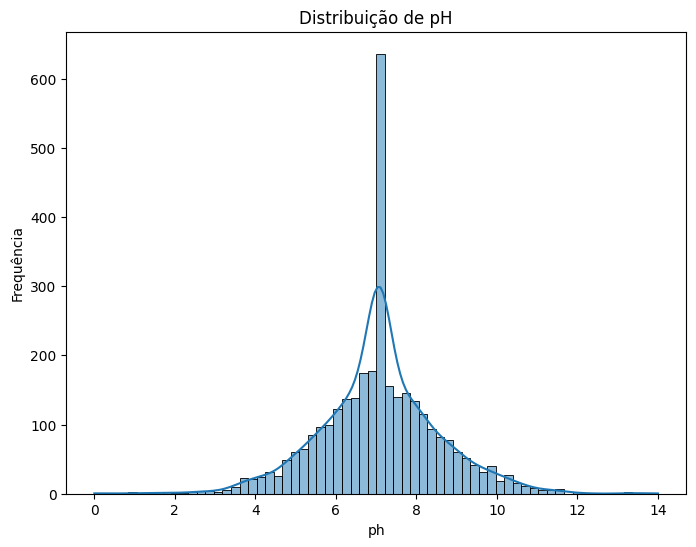

In [ ]:
# Distribuição de pH
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='ph', kde=True)
plt.title('Distribuição de pH')
plt.xlabel('ph')
plt.ylabel('Frequência')
plt.show()

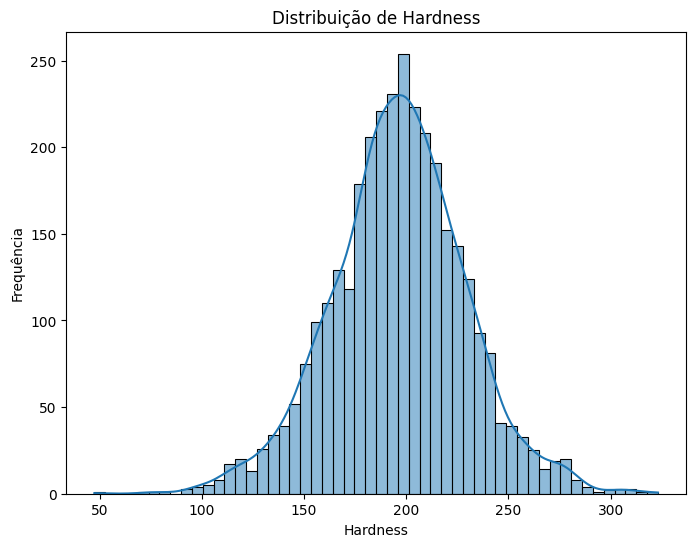

In [ ]:
# Distribuição de Hardness
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Hardness', kde=True)
plt.title('Distribuição de Hardness')
plt.xlabel('Hardness')
plt.ylabel('Frequência')
plt.show()

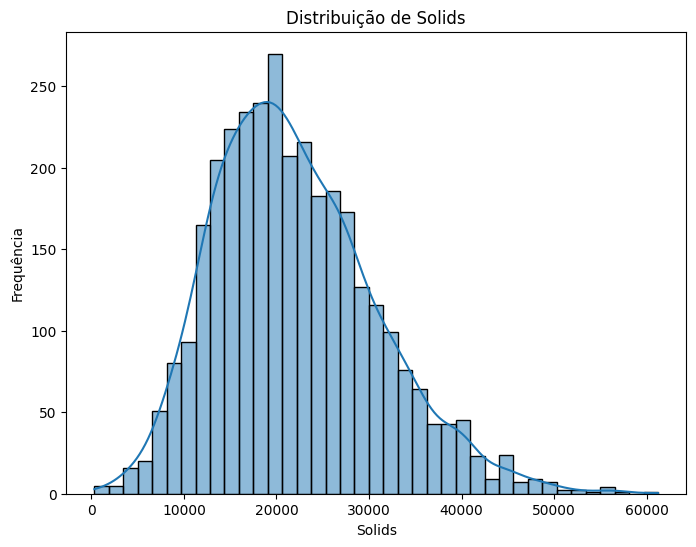

In [ ]:
# Distribuição de Solids
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Solids', kde=True)
plt.title('Distribuição de Solids')
plt.xlabel('Solids')
plt.ylabel('Frequência')
plt.show()

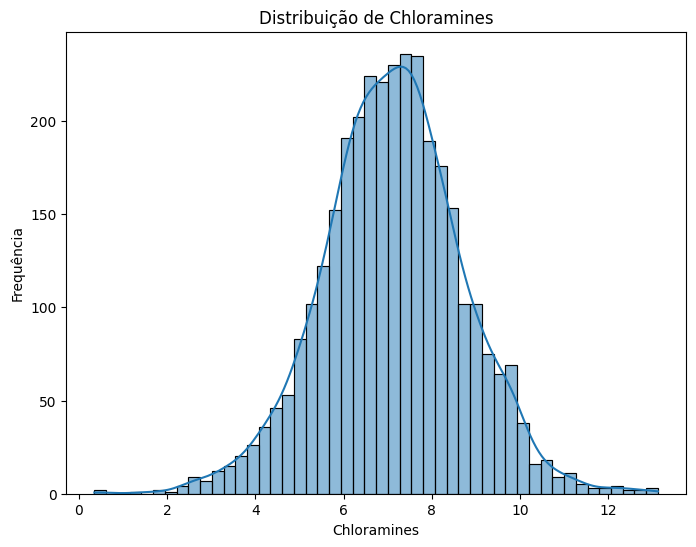

In [ ]:
# Distribuição de Chloramines
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Chloramines', kde=True)
plt.title('Distribuição de Chloramines')
plt.xlabel('Chloramines')
plt.ylabel('Frequência')
plt.show()

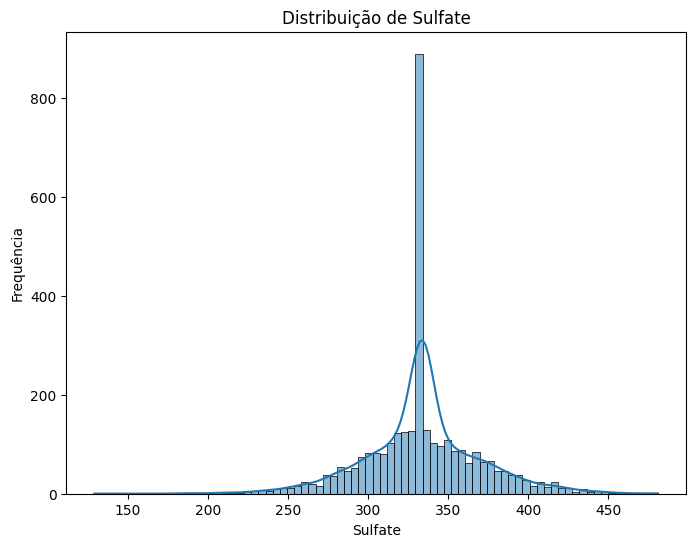

In [ ]:
# Distribuição de Sulfate
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Sulfate', kde=True)
plt.title('Distribuição de Sulfate')
plt.xlabel('Sulfate')
plt.ylabel('Frequência')
plt.show()

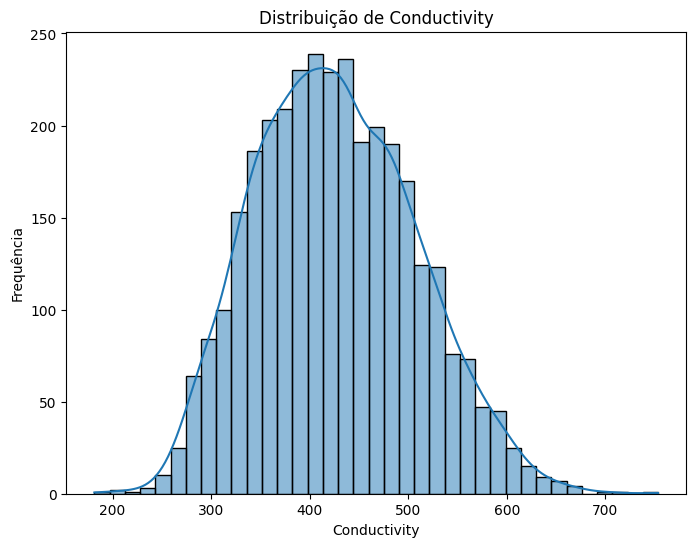

In [ ]:
# Distribuição de ConductiviT
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Conductivity', kde=True)
plt.title('Distribuição de Conductivity')
plt.xlabel('Conductivity')
plt.ylabel('Frequência')
plt.show()

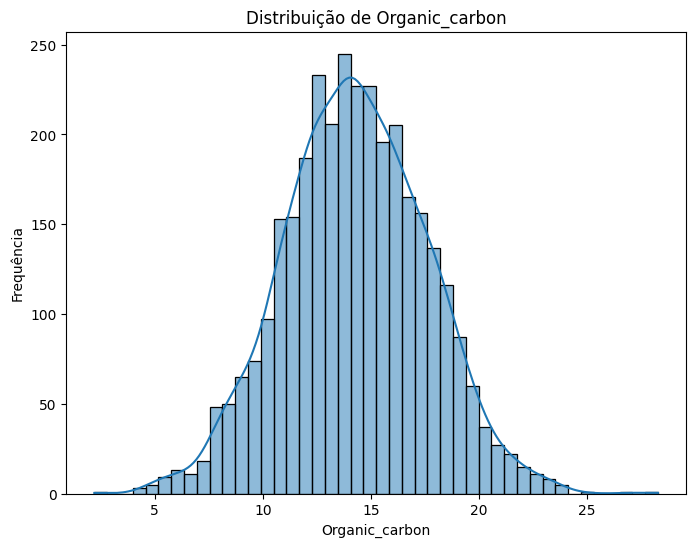

In [ ]:
# Distribuição de Organic_carbon
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Organic_carbon', kde=True)
plt.title('Distribuição de Organic_carbon')
plt.xlabel('Organic_carbon')
plt.ylabel('Frequência')
plt.show()

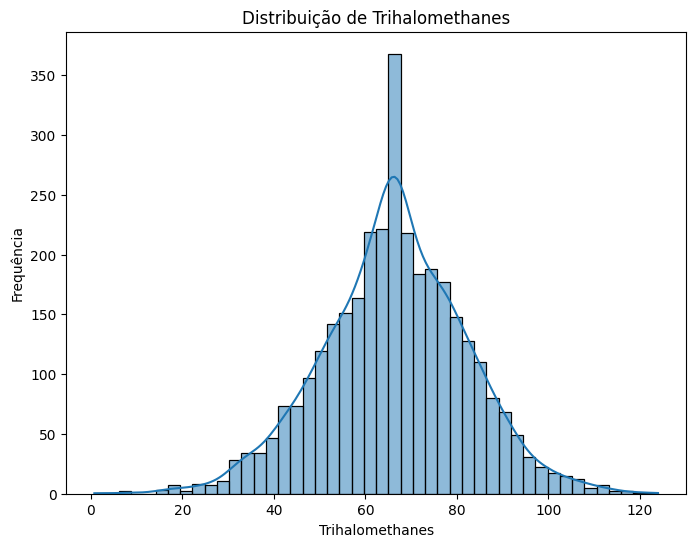

In [ ]:
# Distribuição de Trihalomethanes
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Trihalomethanes', kde=True)
plt.title('Distribuição de Trihalomethanes')
plt.xlabel('Trihalomethanes')
plt.ylabel('Frequência')
plt.show()

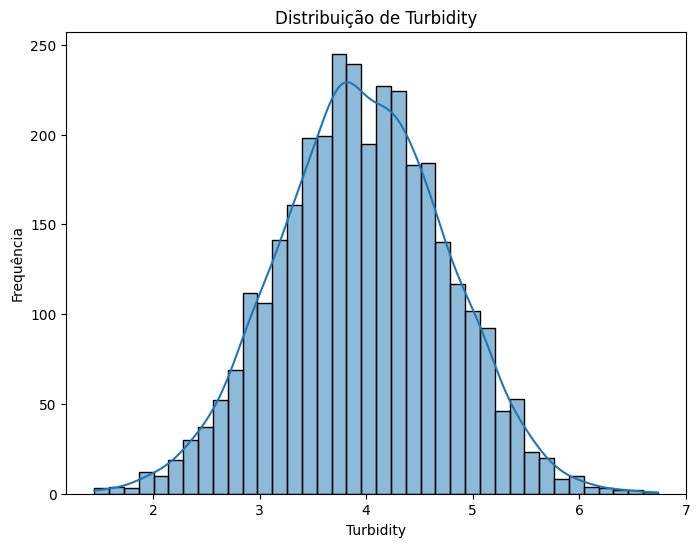

In [ ]:
# Distribuição de Turbidity
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Turbidity', kde=True)
plt.title('Distribuição de Turbidity')
plt.xlabel('Turbidity')
plt.ylabel('Frequência')
plt.show()

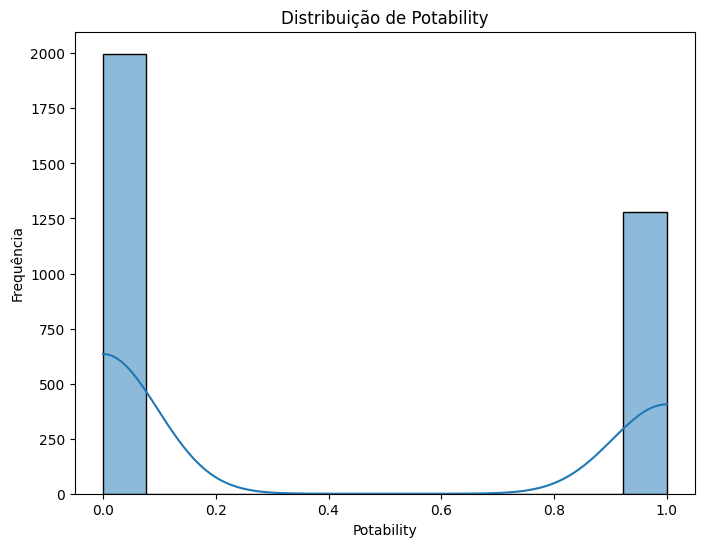

In [ ]:
# Distribuição de Potability
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Potability', kde=True)
plt.title('Distribuição de Potability')
plt.xlabel('Potability')
plt.ylabel('Frequência')
plt.show()

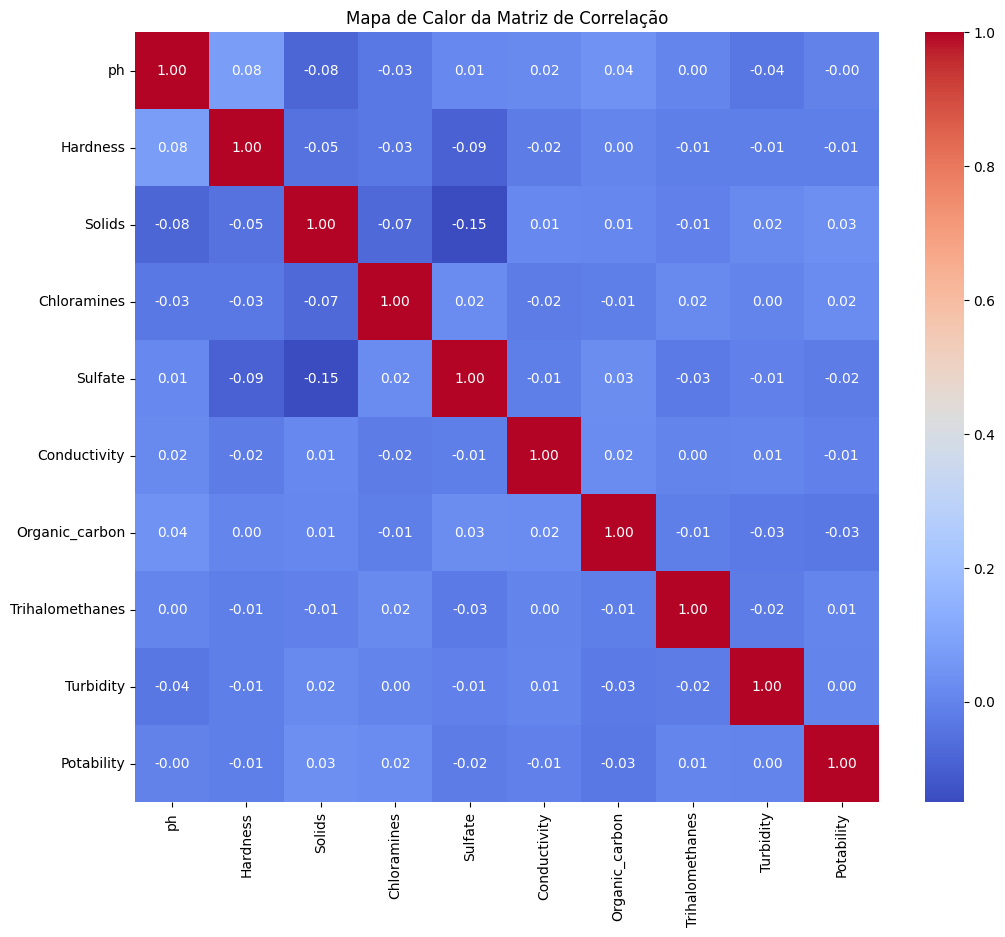

In [ ]:
#Matriz de Correlação
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

## Resultados da Análise Exploratória de Dados (EDA)


*   **pH**: A média do pH é de aproximadamente 7.08, que está dentro da faixa ideal para água potável (6.5 a 8.5). No entanto, o desvio padrão é relativamente alto (1.47), indicando uma variação considerável nos valores de pH. Os valores mínimo (0) e máximo (14) sugerem a presença de outliers ou dados extremos.
*   **Hardness (Dureza)**: A dureza média da água é de cerca de 196.37. A faixa de dureza varia de 47.43 a 323.12.
*   **Solids (Sólidos Dissolvidos Totais)**: A média de sólidos dissolvidos é alta (22014.09), com um desvio padrão grande (8768.57), indicando uma ampla dispersão dos valores. O valor máximo é significativamente alto (61227.20).
*   **Chloramines (Cloraminas)**: A média de cloraminas é de aproximadamente 7.12, com uma variação considerável (desvio padrão de 1.58).
*   **Sulfate (Sulfato)**: A média de sulfato é de cerca de 333.78, com um desvio padrão de 36.14.
*   **Conductivity (Condutividade)**: A condutividade média é de 426.21, com um desvio padrão de 80.82.
*   **Organic_carbon (Carbono Orgânico)**: A média de carbono orgânico é de 14.28, com uma variação moderada (desvio padrão de 3.31).
*   **Trihalomethanes (Trihalometanos)**: A média de trihalometanos é de 66.40, com um desvio padrão de 15.77.
*   **Turbidity (Turbidez)**: A turbidez média é de 3.97, com um desvio padrão de 0.78.
*   **Potability (Potabilidade)**: A média de potabilidade é de 0.39, indicando que aproximadamente 39% das amostras de água neste conjunto de dados são consideradas potáveis (representadas pelo valor 1).

### Matriz de Correlação

A matriz de correlação (acima) mostra a relação linear entre as diferentes variáveis.

*   Em geral, as correlações entre as variáveis são baixas, o que sugere que não há relações lineares fortes entre a maioria dos atributos e a potabilidade da água.
*   A variável `Potability` apresenta correlações muito baixas com todas as outras variáveis, indicando que nenhum dos atributos individualmente tem uma forte correlação linear com a potabilidade. Isso pode sugerir que a potabilidade da água é influenciada por uma combinação complexa de fatores, em vez de uma única variável.
*   Algumas variáveis apresentam correlação moderada entre si, como `Solids` e `Sulfate` (correlação negativa de -0.15), e `Hardness` e `Sulfate` (correlação negativa de -0.09).

# Modelagem Preditiva

In [ ]:
# Separar features (X) e alvo (y)
X = df.drop(columns=['Potability'])
y = df['Potability']

# Padronizar as variáveis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# Treinar o modelo Random Forest
model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\n=== Avaliação do Modelo ===")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


=== Avaliação do Modelo ===
Acurácia: 0.6661585365853658
ROC AUC: 0.6616357421875001

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       400
           1       0.68      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.67      0.60      0.58       656
weighted avg       0.67      0.67      0.62       656



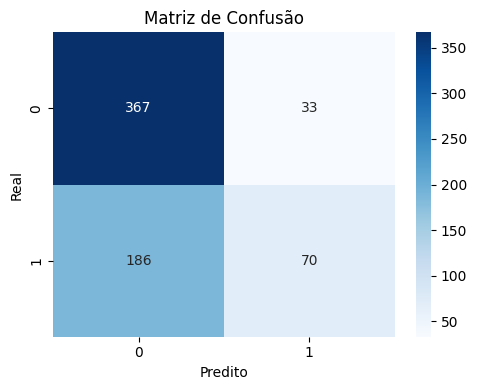

In [ ]:
# Matriz de Confusão
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

In [56]:
# Importância das Features
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print("\n Importância das Features ")
print(feat_imp)


 Importância das Features 
           Feature  Importancia
0               ph     0.129463
4          Sulfate     0.125119
1         Hardness     0.119344
3      Chloramines     0.116449
2           Solids     0.113603
5     Conductivity     0.101303
8        Turbidity     0.099467
6   Organic_carbon     0.098161
7  Trihalomethanes     0.097091


/tmp/ipython-input-2755199505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')


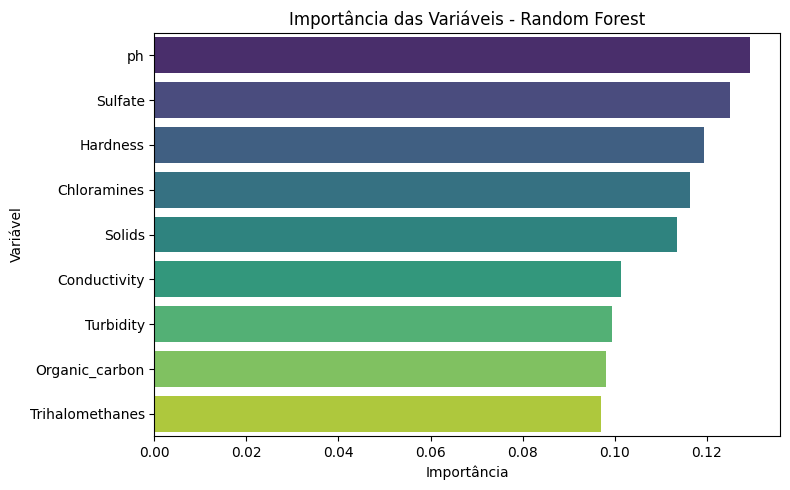

In [ ]:
# Visualizar Importância das Features
plt.figure(figsize=(8,5))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

## Resultados da Modelagem Preditiva

### Avaliação do Modelo Random Forest

*   **Acurácia**: A acurácia do modelo é de aproximadamente 0.666. Isso representa a proporção de previsões corretas feitas pelo modelo.
*   **ROC AUC**: O valor do ROC AUC é de aproximadamente 0.662. O ROC AUC mede a capacidade do modelo de distinguir entre as classes positiva e negativa. Um valor mais próximo de 1 indica um desempenho melhor.
*   **Relatório de Classificação**: O relatório de classificação fornece métricas detalhadas como Precisão, Recall e F1-Score para cada classe (potável e não potável).
    *   **Precisão**: Classe 0: 0.66, Classe 1: 0.68
    *   **Recall**: Classe 0: 0.92, Classe 1: 0.27
    *   **F1-Score**: Classe 0: 0.77, Classe 1: 0.39
*   **Matriz de Confusão**: A matriz de confusão mostra o número de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos. Isso ajuda a entender onde o modelo está acertando e errando.

### Importância das Variáveis

A análise de importância das variáveis revelou quais características foram mais relevantes para o modelo Random Forest na previsão da potabilidade da água.

As 5 variáveis mais importantes são:

1.  **ph**
2.  **Sulfate**
3.  **Hardness**
4.  **Chloramines**
5.  **Solids**

Esses resultados sugerem que essas variáveis têm o maior impacto na determinação se uma amostra de água é potável ou não, de acordo com este modelo.

## Deficiência na previsão:

####  Dependência de variáveis conhecidas
Um modelo supervisionado só “aprende” com os atributos presentes no dataset.  
Se a amostra real contém compostos químicos novos (não medidos ou não registrados),  
o modelo não possui nenhuma base estatística para avaliá-los.

#### Ausência de representatividade química
Compostos não informados podem alterar as propriedades da solução  
(como **pH**, **condutividade**, **carbono orgânico** etc.) de maneira imprevisível.  
Isso quebra o padrão aprendido pelo modelo, levando a previsões incorretas.

#### Não linearidade e interações complexas
A qualidade da água depende de interações químicas dinâmicas entre diversos elementos.  
Mesmo modelos como **Random Forest** não conseguem inferir relações causais de compostos não observados —  
apenas correlacionar padrões vistos.

#### Sensibilidade a ruídos e extrapolação
Quando o modelo é exposto a dados fora do domínio de treino (como novos contaminantes),  
ele tende a **extrapolar mal**, pois não aprendeu as relações físico-químicas  
que governam o comportamento desses novos elementos.


# Conclusão Final
O modelo de Machine Learning para potabilidade da água é eficaz dentro do domínio químico conhecido e mensurado, mas não se adapta quando a amostra contém compostos não detectados ou desconhecidos, pois esses afetam as propriedades da solução de forma não mapeada estatisticamente.
Para lidar com isso, seria necessário integrar o modelo a técnicas químicas avançadas de espectrometria, sensores inteligentes ou modelos de aprendizado não supervisionado capazes de detectar anomalias químicas fora do padrão aprendido.